In [ ]:
#librerias:
import pandas as pd
import matplotlib.pyplot as plt
from pickle import PickleBuffer
from textwrap import dedent

In [ ]:
!pip install python-docx


In [ ]:
import docx
import pandas as pd

file_path = '/content/Output.docx'

# Create a new Word document object
doc = docx.Document(file_path)

# Create a data frame
datos_columns = ['Dia y Hora', 'CO2', 'Temperatura', 'Humedad']
datos = pd.DataFrame(columns=datos_columns)

# Parameters for data extraction
TT = "TT:"
CO2 = "CO2:"
T = "|T:"
H = ",H:"

# Process each paragraph and extract data
for paragraph in doc.paragraphs:
    line = paragraph.text
    print(line)
    pos = line.find(TT)
    pos2 = line.find(CO2)
    pos3 = line.find(T)
    pos4 = line.find(H)
    if (pos, pos2, pos3, pos4) !=-1:
      dd = line[pos + len(TT):]
      dd2 = line[pos2 + len(CO2):]
      dd3 = line[pos3 + len(T):]
      dd4 = line[pos4 + len(H):]

      pb = dd.find("|")
      pb2 = dd2.find("|")
      pb3 = dd3.find(",")

      if pb != -1:
        dhb = dd[:pb]
        dhb2 = float(dd2[:pb2])
        dhb3 = float(dd3[:pb3])
        dhb4 = float(dd4[:5])
        print(f"Fecha y hora: {dhb}, C02: {dhb2}, Temperatura: {dhb3}, Humedad: {dhb4}")
        datos = pd.concat([datos, pd.DataFrame({'Dia y Hora': [dhb], 'CO2': [dhb2], 'Temperatura': [dhb3], 'Humedad': [dhb4]})], ignore_index=True)
      else:
        print("No se encontró una barra '|' después de la cadena buscada.")
    else:
      print(f"La cadena '{CO2}' no está presente en la cadena original.")




TT:23-11-05 13.57.02|CO2:0556|T:31.03,H:30.00
Fecha y hora: 23-11-05 13.57.02, C02: 556.0, Temperatura: 31.03, Humedad: 30.0
TT:23-11-05 13.57.02|CO2:0556|T:23.03,H:30.00
Fecha y hora: 23-11-05 13.57.02, C02: 556.0, Temperatura: 23.03, Humedad: 30.0
TT:23-11-05 13.57.06|CO2:0556|T:23.03,H:30.00
Fecha y hora: 23-11-05 13.57.06, C02: 556.0, Temperatura: 23.03, Humedad: 30.0
TT:23-11-05 13.57.06|CO2:0556|T:23.03,H:30.00
Fecha y hora: 23-11-05 13.57.06, C02: 556.0, Temperatura: 23.03, Humedad: 30.0
TT:23-11-05 13.57.10|CO2:0556|T:23.03,H:30.00
Fecha y hora: 23-11-05 13.57.10, C02: 556.0, Temperatura: 23.03, Humedad: 30.0
TT:23-11-05 13.57.10|CO2:0556|T:23.03,H:30.00
Fecha y hora: 23-11-05 13.57.10, C02: 556.0, Temperatura: 23.03, Humedad: 30.0
TT:23-11-05 13.57.13|CO2:0556|T:23.03,H:30.00
Fecha y hora: 23-11-05 13.57.13, C02: 556.0, Temperatura: 23.03, Humedad: 30.0
TT:23-11-05 13.57.13|CO2:0556|T:23.03,H:30.00
Fecha y hora: 23-11-05 13.57.13, C02: 556.0, Temperatura: 23.03, Humedad: 30.0


In [ ]:
datos

,Dia y Hora,CO2,Temperatura,Humedad
0,23-11-05 13.57.02,556.0,31.03,30.0
1,23-11-05 13.57.02,556.0,23.03,30.0
2,23-11-05 13.57.06,556.0,23.03,30.0
3,23-11-05 13.57.06,556.0,23.03,30.0
4,23-11-05 13.57.10,556.0,23.03,30.0
...,...,...,...,...
1407,23-11-05 14.04.10,519.0,23.03,30.0
1408,23-11-05 14.04.13,499.0,23.03,30.0
1409,23-11-05 14.04.15,499.0,23.03,30.0
1410,23-11-05 14.04.17,499.0,23.03,30.0


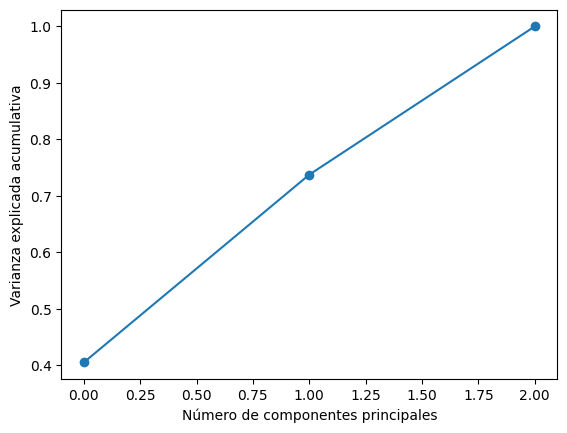

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = datos[['CO2', 'Temperatura', 'Humedad']]

# Estandarizar los datos (si es necesario)
X_std = (X - X.mean()) / X.std()

# Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(X_std)

# Varianza explicada acumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Gráfico de la varianza explicada acumulativa
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()


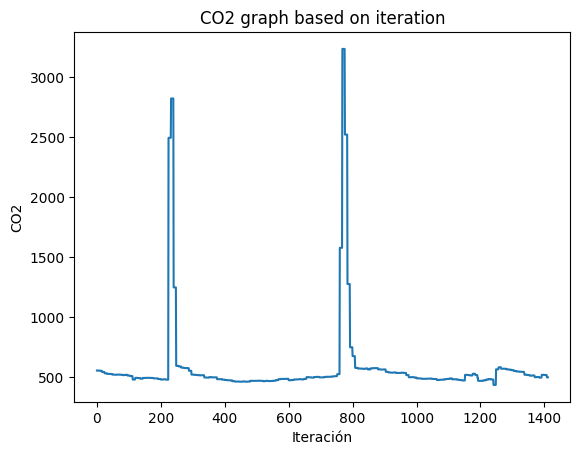

In [ ]:
datos['iteracion'] = range(1412)


plt.plot(datos['iteracion'], datos['CO2'])
plt.xlabel('Iteración')
plt.ylabel('CO2')
plt.title('CO2 graph based on iteration')
plt.show()
